<a href="https://colab.research.google.com/github/Rtniewi/advanced-data-ADVDS/blob/main/HW6/ADS_project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 792
//12/3/2025
//Project 6
#### The purpose of this assignment is to train neural networks to classify 3 classes: Normal, Suspect, and Pathological, using the fetal health dataset. The model should then try and be improved by experimenting with hidden layers, nodes, and batch size, which can be found using GridSearch.

### **Import Dependencies**

In [1]:
!pip install scikeras

In [2]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [26]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 829.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 152.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.7 MB/s eta 0:00:00


In [29]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot
from numpy import where

### **Load the Dataset**

In [13]:
# The Fetal Health Classification dataset includes 2,126 records of 22 rows (21 features, 1 target) extracted from
# Cardiotocogram exams, which were classified by three expert obstericians into 3 classes: Normal, Suspect, Pathological

# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fetal-health-classification' dataset.
Path to dataset files: /kaggle/input/fetal-health-classification


In [14]:
# Read the Training Dataset

health = pd.read_csv(path + "/fetal_health.csv")

health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## **1) Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.**

In [15]:
# Correlations between various factors and the target show that prolonged decelerations play the most important role.

df.corr()

health.corr()

# All values are numeric attributes

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<Axes: >

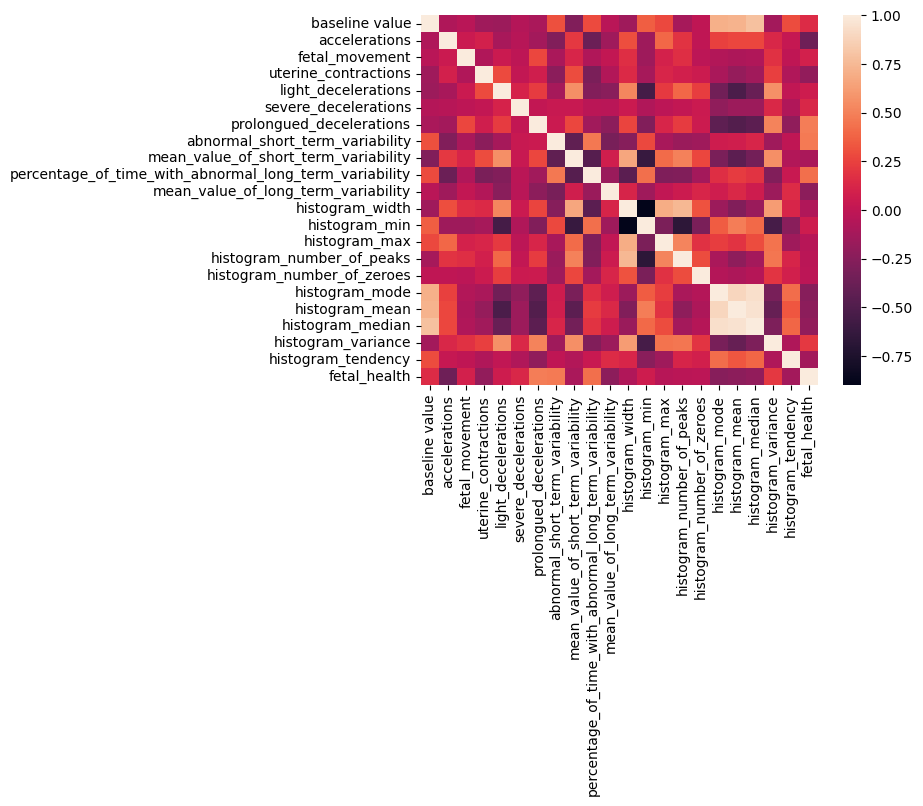

In [16]:
# Use a heat map to visualize the results
sns.heatmap(health.corr())

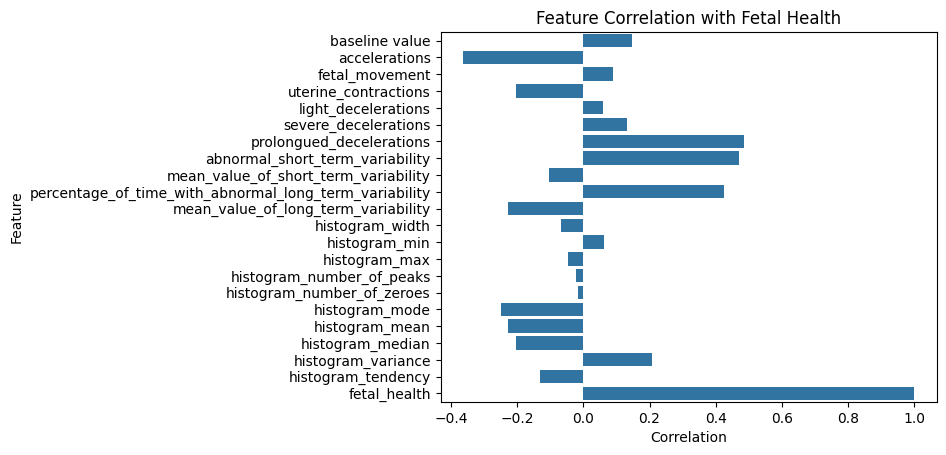

In [17]:
# Isolated fetal_health and other features to make it easier to read
sns.barplot(x=health.corr()['fetal_health'], y=health.corr().index)
plt.title('Feature Correlation with Fetal Health')
plt.ylabel('Feature')
plt.xlabel('Correlation')
plt.show()

## **Correlation Analysis**

The weakest values in relation to fetal_health will be dropped for testing. These will include:
* accelerations
* uterine_contractions
* mean_value_of_long_term_variability
* histogram_mean
* histogram_mode


When analyzing the heatmap, histogram_mean, histogram_mode, and histogram median displayed very similar values according to the heatmap. To narrow down features and because all three values are weakly correlated, only histogram_median will be used because it is the closest to a positive correlation.  


Some values with positive correlations to fetal_health that should help train and improve the model:
* prolonged_decelerations
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability




## **2) Plot a histogram for the class distributions.**

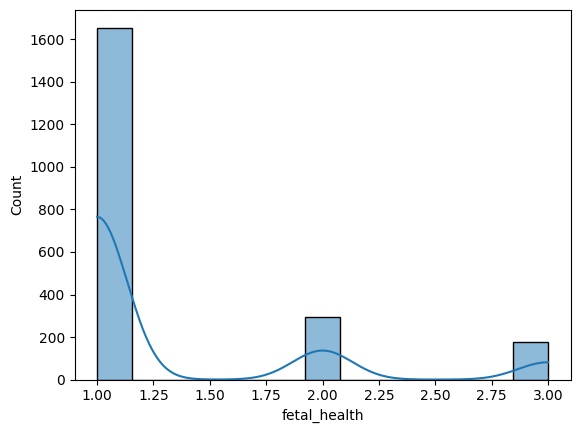

In [18]:
# Plotting the class distributions
sns.histplot(health.fetal_health, kde=True)
plt.show()

## **3) Clean the dataset by handling missing data values, scaling, encoding, etc., as necessary.**

In [19]:
# drop columns that have weak correlations to the fetal_health target
drop_health = health.drop(['accelerations', 'uterine_contractions', 'mean_value_of_long_term_variability','histogram_mean','histogram_mode'], axis=1)

In [20]:
# To find null values of dataset
drop_health.isnull().sum()

# No features have null values.

,0
baseline value,0
fetal_movement,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0
histogram_width,0
histogram_min,0


In [21]:
# 2,126 columns and 17 rows(16 features)
drop_health.shape

(2126, 17)

In [22]:
# all numeric values need to be scaled

# remove the dependent (predictor) parameter from the training set
X = drop_health.drop('fetal_health', axis =1).values
# y values have to be adjusted because Sparse Categorical Crossentropy expects index values starting at [0], not [1]
y = (drop_health["fetal_health"]-1).astype("int32")


scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# set aside the normalized data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=22)

## **4) Create a sequential neural model.**

In [30]:
# train a network with 2 hidden layers (100 and 50 nodes) and 3 output nodes, one for each class
# too many hidden layers and nodes/hidden layer can cause overfitting
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[1],]),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# lets examine the model architecture

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,903 (26.96 KB)

 Trainable params: 6,903 (26.96 KB)

 Non-trainable params: 0 (0.00 B)

## **5) Evaluate the model and display the classification scores and the confusion matrix.**

In [32]:
# Compile the model using appropriate parameters
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


# fit() produces a history object that contains all the details about the classifier including accuracy scores
# experiment with epochs and batch_size to see how they affect overall accuracy
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# we can track accuracy/loss as well as validated accuracy/loss measures
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [33]:
# Let's get a prediction and a classification report from the model

y_pred = np.argmax(model.predict(X_test), axis=-1)

# print various classification performance measures
confusion_map = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, labels=[0,1,2]))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       493
           1       0.67      0.48      0.56        94
           2       0.86      0.73      0.79        51

    accuracy                           0.88       638
   macro avg       0.81      0.73      0.76       638
weighted avg       0.87      0.88      0.87       638



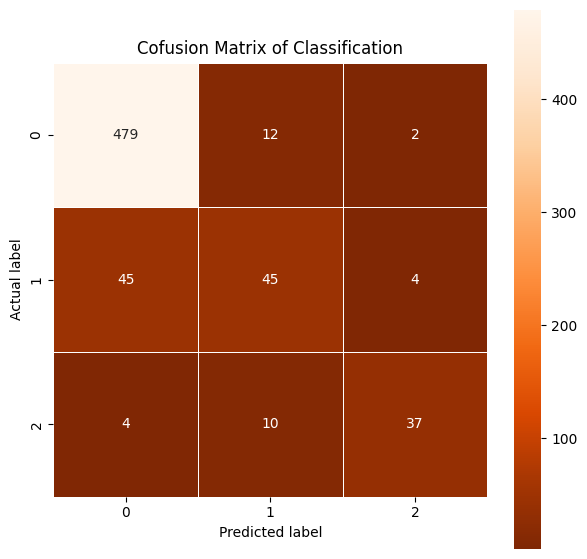

In [34]:
# Displayed the confusion matrix above clearer as heatmap

# Visualize the confusion matrix as a heatmap

plt.figure(figsize=(7,7))
sns.heatmap(confusion_map, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
plt.title("Cofusion Matrix of Classification")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **Prediction and Classification Analysis**

Label 1 (Suspect class) had the lowest scores in all categories. The lowest being recall with 48% of correctly predicted positive instances out of all actual positive instances. The F1 score for overall performance for label 1 was 56%. This model could be improved if Label 1 was able to classify better. The confusion matrix confirms this, as label 1 correctly classified 45 values but also misclassified 45 values, mislabeled as label 0.

One possibility of a low score could be if the models' 0 and 2 categories are the min and max of the data. If category 1 is between them, it may misclassify more because it has a higher chance of choosing 0 and 2. If we had label 2 data, it may be on the higher end of values and may only be misclassified with 1 value, as it would not be near 0 classifications. This is similar to the iris classification dataset.


## **6) Plot the model's accuracy/loss values as well as the validated accuracy/loss values during training.**

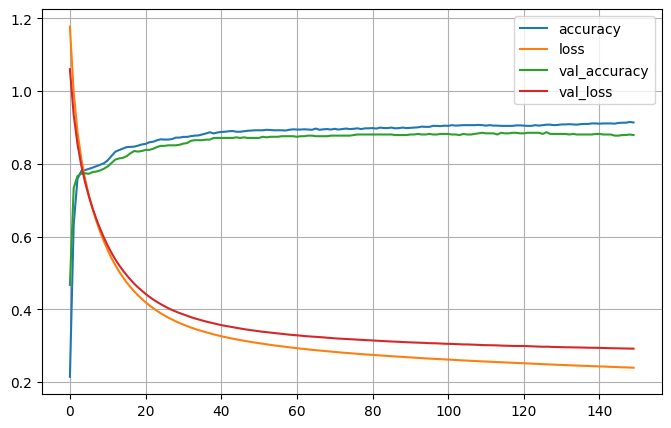

In [35]:
# the close gaps between accuracy/loss and validated accuracy/loss verify that
# overfitting is not severe in the model

# plot model accuracy and loss during training
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()


### **Model Accuracy and Loss Values Analysis**

This model's accuracy and loss are performing fairly well. As the epochs increase, the gaps slightly increase, which is expected. This model's hyperparameters could still improve the gaps by using the GridSearchCV to find the optimal batch size, epochs, and layers. Currently, the NN model's baseline accuracy is 90%.



## **7) Cross-validate the NN model, and calculate the mean accuracy of the folds.**


In [36]:
# create the sequential NN model
def create_baseline():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[1],]),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model



# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaled_X, y, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Baseline accuracy: 89.98% (+/- 0.61%)



## **8) Experiment with # hidden layers, # nodes / hidden layer, batch size, etc. to see which combinations produce a better accuracy. You may use grid search, if you wish.**


In [38]:
# create the sequential NN model to use with the GridSearchCV
def create_baseline(units1=100, units2=50):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[1],]),
        keras.layers.Dense(units1, activation="relu"),
        keras.layers.Dense(units2, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaled_X, y, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

#Resource code found here: https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/
# 16(inputs) * 3(outputs) = 48 would be a good starting point for layers.
params={'batch_size':[30, 60],
        'epochs':[50, 100, 200],
        'model__units1':[48, 96, 192],
        'model__units2':[24, 48, 96],
        }

gs=GridSearchCV(estimator=estimator, param_grid=params, cv=3)

# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X, y)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Baseline accuracy: 77.94% (+/- 0.06%)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `inpu

In [39]:

print("The best achieved accuracy after hyperparameter optimization: %.2f \n" % (gs.best_score_))

print("The best DT model hyperparameters:", gs.best_params_)


The best achieved accuracy after hyperparameter optimization: 0.84 

The best DT model hyperparameters: {'batch_size': 60, 'epochs': 200, 'model__units1': 192, 'model__units2': 48}


## **9) Summarize your findings.**

### **Results**
This Neural Network was able to classify 3 classes: Normal, Suspect, and Pathological with ~90% accuracy.


### **Preparing the Data**
All numeric values were scaled, and y values were adjusted to start at 0 instead of 1 to work with sparse categorical crossentropy.


### **Feature Engineering**
These values were dropped to improve classification, as these features had very low correlation with class labels:
* accelerations
* uterine_contractions
* mean_value_of_long_term_variability
* histogram_mean
* histogram_mode


### **Grid Search**
The best model hyperparameters after using GridSearch:
* batch size: 60
* epochs: 200
* dense layer 1: 192
* dense layer 2: 48


Very similar to the original models' hyperparameters:
* batch size: 128
* epochs: 150
* dense layer 1: 100
* dense layer 2: 50


For the GridSearch model, the batch size and dense layer were increased, and achieved an accuracy of 84%.

### **Conclusion**
Overall, using the GridSearch to find optimal hyperparameters did not improve the model. At 90% accuracy, the model is performing well. If I wanted to improve this model more, I could try selecting only the features that have the strongest correlation with the class labels. However, this could also increase the chance for overfitting if less data is included. The dataset may perform better if it includes more examples for class 1, as this was the label that had the lowest score individually.